**ΠΑΝΕΠΙΣΤΗΜΙΟ ΠΕΙΡΑΙΩΣ**
**ΤΜΗΜΑ ΠΛΗΡΟΦΟΡΙΚΗΣ**

Απαλλακτική εργασία για το μάθημα 'ΕΠΕΞΕΡΓΑΣΙΑ ΣΗΜΑΤΩΝ ΦΩΝΗΣ ΚΑΙ ΗΧΟΥ'

---

*Η εργασία υλοποιήθηκε απο τον φοιτητή:*
***Βεργιάννη Νικόλαο - Π16170***

*Υλοποιήθηκε σε google colab καθώς είναι ένα δωρεάν περιβάλλον Jupyter που λειτουργεί στο cloud. Το colab υποστηρίζει πολλές βιβλιοθήκες μηχανικής μάθησης και μας πάρεχει δωρεαν GPU runtime.*

---




##ΛΙΓΑ ΠΡΑΓΜΑΤΑ ΓΙΑ ΤΑ ΕΠΕΞΕΡΓΑΣΙΑ ΣΗΜΑΤΟΣ


Όταν ένα αντικείμενο δονείται, τα μόρια αέρα ταλαντεύονται από και προς τη θέση ανάπαυσης και μεταδίδουν την ενέργειά του σε γειτονικά μόρια. Αυτό έχει ως αποτέλεσμα τη μετάδοση ενέργειας από ένα μόριο σε άλλο το οποίο με τη σειρά του παράγει ένα ηχητικό κύμα

**ΠΑΡΑΜΕΤΡΟΙ ΕΝΟΣ ΣΗΜΑΤΟΣ ΗΧΟΥ**

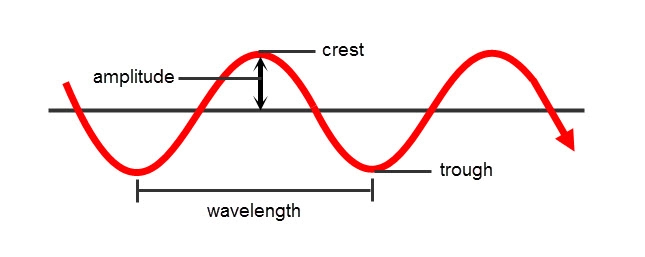

*   **Πλάτος:** πλάτος αναφέρεται στη μέγιστη μετατόπιση των μορίων αέρα από τη θέση ηρεμίας
*   **Κορυφή και κοιλότητα**:Η κορυφή είναι το υψηλότερο σημείο του κύματος ενώ η κοιλότητα είναι το χαμηλότερο σημείο
*   **Μήκος κύματος:** Η απόσταση μεταξύ 2 διαδοχικών κορυφών ή γούρνων είναι γνωστή ως μήκος κύματος
*   **Συχνότητα :** Η συχνότητα αναφέρεται στο πόσο γρήγορα αλλάζει ένα σήμα για μια χρονική περίοδο
*  **Κύκλος :** Κάθε ηχητικό σήμα διασχίζει τη μορφή κύκλων. Μια ολοκληρωμένη κίνηση προς τα πάνω και προς τα κάτω του σήματος σχηματίζει έναν κύκλο










**Μετατροπή**

Η μετατροπή πραγματοποιείται μέσω της δειγματοληψίας (sampling), η οποία συνήθως πραγματοποιείται σε δύο στάδια, στο στάδιο της διακριτοποίησης (discretization) και της κβάντισης σήματος (quantization). Η διακριτοποίηση σημαίνει ότι το σήμα χωρίζεται σε ίσα χρονικά διαστήματα και κάθε διάστημα αντιπροσωπεύεται από μία μόνο μέτρηση πλάτους (amplitude). Η κβάντιση σήματος  σημαίνει ότι η κάθε μέτρηση πλάτους προσεγγίζεται με μία τιμή από ένα πεπερασμένο σύνολο. 

Η συχνότητα δειγματοληψίας η ρυθμός δειγματοληψίας μετριέται σε Hz και εκφράζει το πλήθος δειγμάτων που λαμβάνονται σε διάρκεια ενός δευτερολέπτου.

Εάν fs = 8.000Hz σημαίνει οτι ο δειγματολήπτης λαμβάνει 8.000 δείγματα ανα δευτερόλπετο σήματος. Η χρονική απόσταση υπολογίζεται απο τον τύπο 1/Τ, όπου Τ είναι η περίοδος δειγματοληψίας. 
Για fs = 8.000Hz η περίοδος θα είναι Τ = 1/8000 = 0.0008 δευτερόλεπτα.

---






**Θεώρημα Nyquist-Shannon**

Σύμφωνα με το θεώρημα δειγματοληψίας Nyquist–Shannon, το  αποτελεί μία γέφυρα μεταξύ των συνεχών και των διακριτών σημάτων, ένα αναλογικό σήμα μπορεί να αναπαραχθεί από το αντίστοιχο διακριτό όταν έχει χρησιμοποιηθεί συχνότητα δειγματοληψίας η οποία είναι τουλάχιστον διπλάσια από την μέγιστη συχνότητα του αρχικού σήματος. 

Για παράδειγμα, αν οι συχνότητες ενός συνεχούς σήματος εκτείνονται μέχρι τα 8000Hz, τότε πρέπει να χρησιμοποιηθεί συχνότητα δειγματοληψίας τουλάχιστον ίση με 20KHz. Συνηθισμένες συχνότητες δειγματοληψίας για την περίπτωση των ηχητικών σημάτων είναι 44.1KHz για μουσική και 32, 16 ή και 8KHz για ομιλία. 

Επιπλέον, αν και μεγάλες συχνότητες δειγματοληψίας βελτιώνουν την ποιότητα του ψηφιακού σήματος, μπορεί να οδηγήσουν σε μεγάλες υπολογιστικές πολυπλοκότητες στους αλγορίθμους ανάλυσης, καθώς αυξάνουν το πλήθος δειγμάτων ανά δευτερόλεπτο προς επεξεργασία. 


---






In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Τα αρχεία ήχου είναι ήδη κομμένα ως προς την παυση στην αρχή και το τέλος 
αλλιώς θα χρησιμοποιούσαμε την συνάρτηση trim_silence().




In [27]:
!cp '/content/drive/My Drive/myASR/recordingsdataset/split_to_words.py' .

###IMPORT NECESSARY LIBRARIES

In [28]:
#system libraries
import os
from os.path import isdir, join
import pathlib
from pathlib import Path
#for data processing

import numpy as np #linear algebra
import pandas as pd 
import scipy
from scipy import signal
from scipy.fftpack import fft
from scipy.io import wavfile

from tensorflow.python.platform import gfile

import _pickle as pickle
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


import tensorflow as tf

#keras libraries
from keras.utils import np_utils, to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint, History
from keras.models import load_model, Sequential
from keras.models import Model
from keras import backend as K
import random
global str

import split_to_words
!pip install pydub


import time


In [29]:
print(tf.__version__)

2.3.0


**PATHS**

In [30]:
dir_path = '/content/drive/My Drive/myASR'
train_path = '/content/drive/My Drive/myASR/recordingsdataset/recordings'
my_recordings_path = '/content/drive/My Drive/myASR/recordingsdataset/my_recordings'
path = os.path.join(train_path, '*','*.wav')


### PLOTTING THE FEATURES OF A WAV FILE



Αλλαγή του index για να κατασκευάσουμε τα διαγραμμάτα για διαφορετικό αρχείο ήχου

In [31]:
index = 0
wave_path = gfile.Glob(path)[index]
sample_rate, samples = wavfile.read(wave_path)
ipd.Audio(samples,rate=sample_rate)

In [32]:
#func to calculate spectrogram of raw wave file
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

**MFCC feature**

Η βασική ιδέα για τα χαρακτηριστικά MFCC είναι οτι σε κάθε παράθυρο χρόνου, αποδίδει ένα διάνυσμα χαρακτηριστικών που χαρακτηρίζει τον ήχο μέσα στο παράθυρο. Η διάσταση τους είναι πολύ χαμηλότερη απο αυτή του φασματογράφου για αυτο θα την χρησιμοποιήσουμε για το ακουστικό μοντέλο μας ώστε να αποφύγουμε overfitting στο dataset εκπαίδευσης.

---




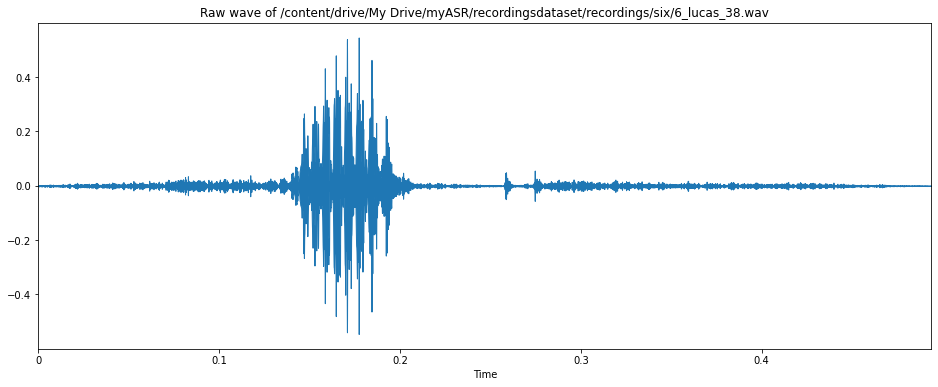

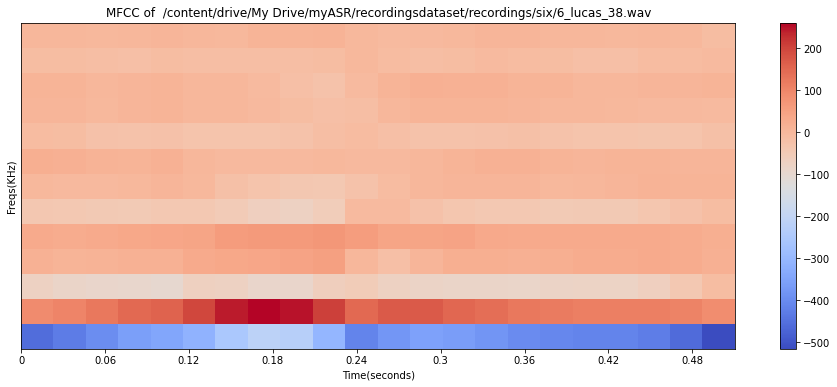

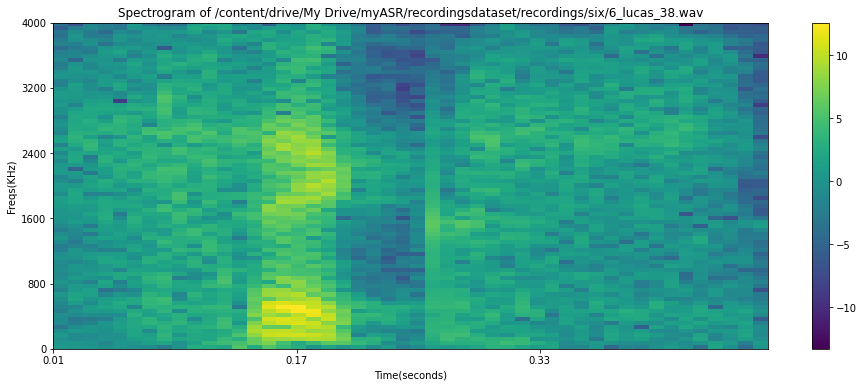

In [33]:

#RAW WAVE
wave, sr = librosa.load(wave_path, mono=True)
plt.figure(figsize=(16,6))
librosa.display.waveplot(wave, sr=sr)
plt.title("Raw wave of " + wave_path)



## MFccs 
mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=13)
plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,x_axis='time')
plt.title("MFCC of  " + wave_path)
plt.ylabel("Freqs(KHz)")
plt.xlabel("Time(seconds)")
plt.colorbar()

## SPECTROGRAM 
sample_rate, samples = wavfile.read(wave_path)
freqs, times, spectrogram = log_specgram(samples,sample_rate)
plt.figure(figsize=(16,6))
plt.title("Spectrogram of " + wave_path)
plt.ylabel("Freqs(KHz)")
plt.xlabel("Time(seconds)")
plt.imshow(spectrogram.T, aspect="auto",origin="lower",
            extent=[times.min(),times.max(), freqs.min(), freqs.max()])
plt.colorbar()
plt.yticks(freqs[::16])
plt.xticks(times[::16])
plt.show()





**PLOT FFT** 


Μετατροπή σήματος σε μεμονωμένα φασματικά στοιχεία που μας παρέχουν πληροφορίες συχνότητας για το σήμα

Frequency sampling 8000
Channels 1
Complete Samplings N 3950
secs 0.49375
Timestep between samples Ts 0.000125


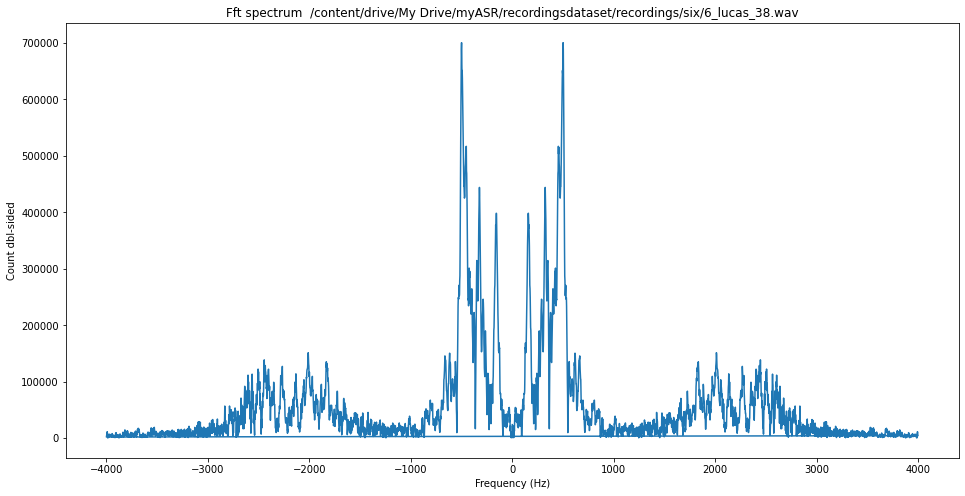

In [34]:
frs, signal = wavfile.read(wave_path)
print ("Frequency sampling", frs)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(frs)
print ("secs", secs)
Ts = 1.0/frs # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)
plt.figure(figsize=(16,8))
plt.plot(freqs, FFT) # plotting the complete fft spectrum
plt.title("Fft spectrum  " + wave_path)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.show()

### AUDIO PROCESSING

**Fourier Transform**

Ο μετασχηματισμός Fourier χρησιμοποιείται για την ανάλυση προβλημάτων που αφορούν σήματα συνεχούς χρόνου ή μίγματα σημάτων συνεχούς και διακριτού χρόνου.
Πολύ λίγες πληροφορίες χάνονται απο το σήμα κατα την διάρκεια του μετασχηματισμού.
Ο μετασχηματισμός Fourier διατηρεί πληροφορίες σχετικά με το πλάτος, τις αρμονικές και τη φάση και χρησιμοποιεί όλα τα μέρη της κυματομορφής για να μεταφράσει το σήμα στον τομέα συχνοτήτων.

In [35]:
def FFT(fs , y , label):
  N = len(y)
  T = 1.0 / fs

  y_freq = fft(y)
  #1st quarter of frequency domain data
  x_freq = np.linspace(0.0, 1.0/(2.0*T), N//2) * 0.5
  #magnitutude frequency
  y_freq = 2.0 * np.abs(y_freq[:int(N/2)])
 
  # plt.plot(x_freq,y_freq,label=str(label) + ' - file :' + label +"N" + str(N)) # plot the fourier transform
  # plt.show()

  return x_freq,y_freq,N
  

**BANDPASS filter**

Εφαρμόστηκε ένα φίλτρο στα αρχεία εισόδου προκειμένου να μειωθούν τα επίπεδα θορύβου και ταυτόχρονα να διατηρηθούν οι πληροφορίες σήματος που μας ενδιαφέρουν να αναλύσουμε.
Με το φίλτρο διατηρούμε τα δεδομένα σήματος που ανήκουν στην τυπική ζώνη συχνοτήτων που σχετίζεται με το μέσο άτομο.
Η φωνή ενός μέσου ενήλικα άνδρα κυμαίνεται από 85 ~ 180 Hz, ενώ η γυναίκα από 165 ~ 255 Hz.

Το φίλτρο που υλοποιήθηκε είναι bandpass με σημεία αποκοπής τα 85~255 Hz και είναι τύπου IIR butterworth.

In [36]:
from scipy import signal
def bandpassFilter(data, fs, lowcut=85, highcut=250, order=4):
  nyq = 0.5 * fs
  low = lowcut/ nyq
  high = highcut / nyq
  b, a = signal.butter(order, [low, high], btype='bandpass')
  y = signal.lfilter(b, a, data)

  return y

**TRIMMING SILENCE**


Αφαιρεί την σιωπή στην αρχή και στο τέλος των δεδομένων ήχου που πέρασε και ταιρίαζει τον θόρυβο βάση των n τελευταίων δειγμάτων και βρίσκει που είναι το μέσο φιλτραρισμένο μέγεθος μεγαλύτερο απο τον θόρυβο

*Τα δεδομένα του dataset είναι ήδη κομμένα ως προς τον θόρυβο οπότε δεν θα χρησιμοποιήσουμε την συνάρτηση*

Θα την χρησιμοποίησουμε όταν θέλουμε να κατατμήσουσε την πρόταση ψηφίων σε λέξεις που εισάγουμε για πρόβλεψη. *βλ. τέλος της σελίδας*

In [37]:
def trim_silence(audio, noise_threshold=150):
    start = None
    end = None

    for idx, point in enumerate(audio):
        if abs(point) > noise_threshold:
            start = idx
            break

    # Reverse the array for trimming the end
    for idx, point in enumerate(audio[::-1]):
        if abs(point) > noise_threshold:
            end = len(audio) - idx
            break

    return audio[start:end]


**DATASET PROCESSING**

Αποθήκευση επεξεργασμένων αρχείων ήχου σε πίνακες για εξαγωγή χαρακτηριστικών και εκπαίδευση μοντέλου.

Number of labels: 10
['six', 'eight', 'two', 'three', 'seven', 'five', 'one', 'nine', 'four', 'zero']
Processing folder: six
Processing folder: eight
Processing folder: two
Processing folder: three
Processing folder: seven
Processing folder: five
Processing folder: one
Processing folder: nine
Processing folder: four
Processing folder: zero


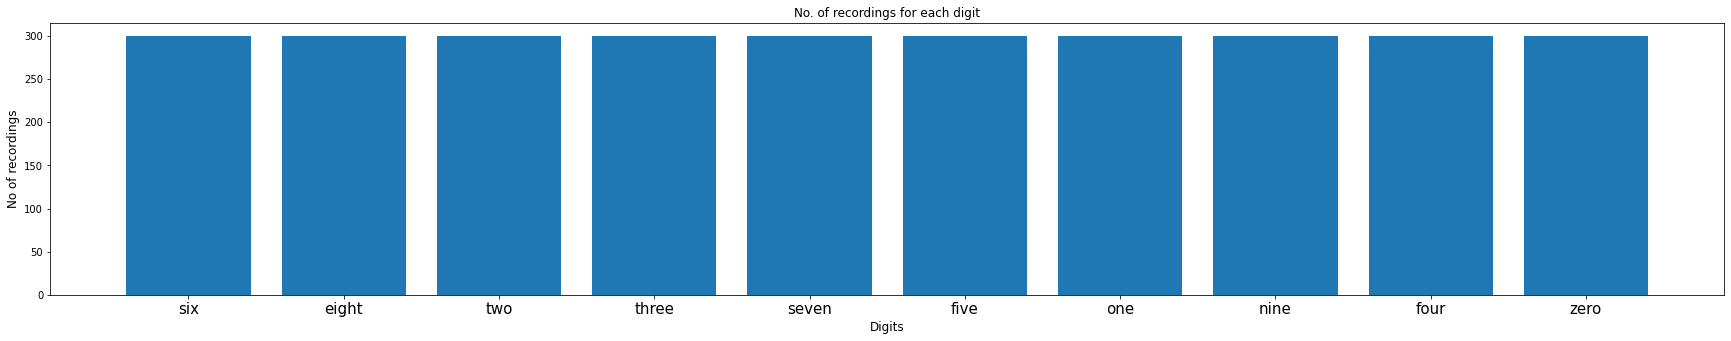

(array([ 895., 1683.,  355.,   46.,   15.,    4.,    0.,    0.,    0.,
           2.]),
 array([0.1435  , 0.357425, 0.57135 , 0.785275, 0.9992  , 1.213125,
        1.42705 , 1.640975, 1.8549  , 2.068825, 2.28275 ]),
 <a list of 10 Patch objects>)

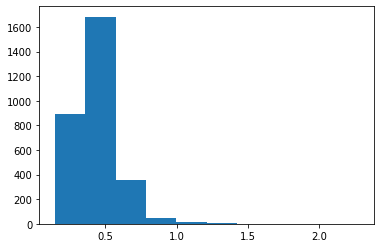

In [38]:

labels = os.listdir(train_path)
dirs = [f for f in os.listdir(train_path) if isdir(join(train_path, f))]
print('Number of labels: ' + str(len(dirs[:])))
print(dirs)


i=0
durations=[]
sum=0
all_processed_samples=[]
all_labels = []
n_of_recordings=[]
all_recordings= []
duration_of_recordings=[]
sr = 8000





for label in labels:
    waves = [f for f in os.listdir(train_path +'/' + label) if f.endswith('.wav')]
    print("Processing folder: "+ label)
    for wave in waves:
      sample , sr = librosa.load(str(train_path + '/' + label + '/' + wave),sr, mono=True) 
      #apply bandpass filter 
      processed_sample = bandpassFilter(sample, sr)
      #processed_sample, index = librosa.effects.trim(originalSample)
      duration = librosa.get_duration(processed_sample)
      sum = sum + duration
      #processed audio files
      all_processed_samples.append(processed_sample)
      i = i+1
      #labels
      all_labels.append(label)
      #raw audios
      all_recordings.append(sample)
      duration_of_recordings.append(float(len(sample)/sr))

n_of_recordings.append(len(waves))
m_duration=sum/i



    

#plot 
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, n_of_recordings)
plt.xlabel('Digits', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15)
plt.title('No. of recordings for each digit')
plt.show()

plt.hist(np.array(duration_of_recordings))

In [39]:
# print(all_processed_samples)

##ΕΞΑΓΩΓΉ ΧΑΡΑΚΤΗΡΙΣΤΙΚΏΝ

Για την εξαγωγή FFT και MFCCs χαρακτηριστικών εφαρμόστηκε stretching ώστε οι τιμές που επιστρέφει ο αλγόριθμος να είναι κοντά μεταξύ τους.Ως αποτέλεσμα η χρονική διάρκεια του σήματος είναι ίδια για όλα τα δεδομενα ώστε το νευρωνικό δίκτυο να αναγνωρίσει με μεγαλύτερη ευκολία τα πρότυπα.

Αν δεν εφαρμοστεί stretching, τα πρότυπα στον άξονα Χ έχουν μεγαλύτερο μήκος ανάλογα με την ταχύτητα που εκφωνούνται απο τον κάθε ομιλητή. Με αυτή τη μέθοδο τα δεδομένα κανονικοποιούνται χωρίς να χάνεται χρήσιμη πληροφορία για την ταξινόμηση τους.

Υπολογίζεται η μέση τιμή των αρχείων ήχου και προσαρμόζονται όλα τα αρχεία στη διάρκεια αυτή.

**ΕΞΑΓΩΓΉ FFT χαρακτηριστικών** 

In [40]:
fft_features = []
fft_sum_duration = 0
k = 0
fftFeaturesSize = 0
print ("Extracting Features from " +str(len(all_processed_samples)) +" files, mean duration="+str(m_duration))

for audio in all_processed_samples:
      
    duration = librosa.get_duration(audio)
    fft_sum_duration += duration
    
    ratio = duration / m_duration
    if ratio < 0.1:
        ratio = 0.1


    audio = librosa.effects.time_stretch(audio, ratio)

    frequency, magnitude, samples = FFT(sr, audio, str(k))

    length = 3000
    
    if len(magnitude) < length:
      zero_pad = np.lib.pad(magnitude, (0, length - len(magnitude)), 'constant',
                                     constant_values=0)
      fft_features.append(zero_pad)
    else:
      fft_features.append(magnitute[:length])


    k = k+1

print("Dataset has been converted from time space to frequency space")
print(str(k)," FT features extracted")



Extracting Features from 3000 files, mean duration=0.15870633408919113
Dataset has been converted from time space to frequency space
3000  FT features extracted


**ΕΞΑΓΩΓΗ MFCCs χαρακτηριστικών**





In [41]:
mfcc_features = []
sum_duration = 0
j=0
equal = 0
larger = 0
smaller = 0

print ("Extracting Features from " +str(len(all_processed_samples)) +" files, mean duration="+str(m_duration))
for audio in all_processed_samples:
      

      
       duration = librosa.get_duration(audio)
       sum_duration = sum_duration + duration

       ratio = duration / m_duration

       if ratio < 0.05:
          ratio = 0.05

       audio = librosa.effects.time_stretch(audio,ratio)

       mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, hop_length=178)
       flat_mfccs = mfccs.flatten()

       featuresSize = 13 * mfccs.shape[0]

       if len(flat_mfccs) < featuresSize:
         zero_pad = np.pad(flat_mfccs, (0, (featuresSize - len(flat_mfccs))),'constant', constant_values=0)
         mfcc_features.append(zero_pad)
         smaller = smaller + 1

       elif len(flat_mfccs) > featuresSize:
         mfcc_features.append(flat_mfccs[:featuresSize])
         larger = larger +1
       else:
         equal = equal +1
         mfcc_features.append(flat_mfccs)

  
       j = j+1

    
m_duration = sum_duration/i    
print("Extracting MFFCs Features from "+str(j)+" files, trimmed duration="+str(m_duration))
print("MFCCs Features have been extracted") 

 


Extracting Features from 3000 files, mean duration=0.15870633408919113
Extracting MFFCs Features from 3000 files, trimmed duration=0.15870633408919113
MFCCs Features have been extracted


In [42]:
mfcc_features = np.array(mfcc_features)
all_labels = np.array(all_labels)
fft_features = np.array(fft_features)

print('Size of X:\n', mfcc_features.shape)     
print('Size of Y:\n', all_labels.shape)
print(mfcc_features.dtype)
print(all_labels.dtype)
print(fft_features.shape)


Size of X:
 (3000, 169)
Size of Y:
 (3000,)
float64
<U5
(3000, 3000)


## TRAINING THE MODEL


**ΑΡΧΙΤΕΚΤΟΝΙΚΗ ΜΟΝΤΕΛΟΥ**

Θα κατασκευάσουμε SpeechToText model χρησιμοποιώντας ένα convolutioan neural network(CNN). 

 
*  **Conv1d :** To conv1d είναι ενα συνελικτικό νευρωνικό δίκτου που εκτελεί τη συνέλιξη σε μία μόνο διάσταση.
*  **MaxPooling1D :** Το MaxPooling1D παίρνει το μέγιστο πέρα ​​από τα βήματα, αλλά περιορίζεται σε ένα pool_size για κάθε βήμα
*   **Dropout :** To dropout ειναι μια τεχνική όπου αγνοούνται τυχαία νευρώνες κατά την διάρκειας της εκπαιδευσης. Αυτο σημαίνει οτι η συμβολή τους στη ενεργοποίηση των κάτω νευρώνων αφαιρείται στην forward φαση και οποιαδήποτε ενημέρωση βάρους δεν εφαρμόζεται στην πίσω όψη του νευρώνα
*   **Flatten() :** Flatten είναι η συνάρτηση που μετατρέπει τον συγκεντρωτικό map χαρακτηριστικών σε μία στήλη που περνά στο πλήρως συνδεδεμένο επίπεδο
*  **Dense layer :** Ένας Dense layer τροφοδοτεί όλες τις εξόδους από το προηγούμενο στρώμα σε όλους τους νευρώνες, όπου κάθε νευρώνας παρέχει μια έξοδο στο επόμενο στρώμα. Είναι το πιο βασικό επίπεδο στα νευρικά δίκτυα.
Έχουμε 10 κλάσεις άρα 2 layers είναι αρκετοί.
*   **softmax_activation :** Χρησιμοποιείται σε νευρωνικά δίκτυα όταν θέλουμε να δημιουργήσουμε έναν ταξινομητή πολλαπλών τάξεων, ο οποίος λύνει το πρόβλημα της εκχώρησης μιας παρουσίας σε μια τάξη όταν ο αριθμός των πιθανών τάξεων είναι μεγαλύτερος από δύο



---


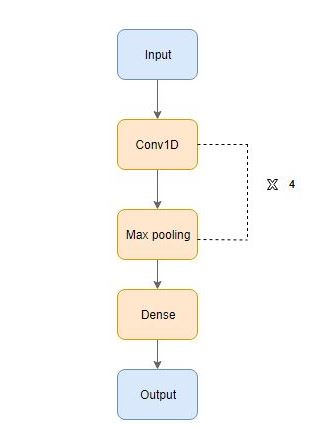







**LABEL ENCODER**

  Αναφέρεται στην μετατροπή των ετικετών σε αριθμητική μορφή έτσι ώστε να είναι αναγνωρίσιμη απο την μηχανή. Είναι ενα σημαντικό βήμα προεπεξεργασίας για το σύνολο δεδομένων στην εποπτευόμενη μάθηση.


**TRAIN TEST SPLITS**
*   **x_train :** Περιλαμβάνει όλες τις ανεξάρτητες μεταβλήτες που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου. Εχουμε καθορίσει το test_size = 0.2, άρα το 80% των παρατηρήσεων απο τα πλήρη δεδομένα θα χρησιμοποιηθούν για την εκπαίδευση / προσαρμογή του μοντέλου και το υπόλοιπο 20% θα χρησιμοποιηθεί για την δοκιμή του μοντέλου.

*   **X_test :** Το υπόλοιπο 20% που θα χρησιμοποιηθούν για να κάνουν προβλέψεις για την δοκιμή της ακρίβειας του μοντέλου

*   **y_train :** Η μεταβλητή που πρέπει να γίνει η πρόβλεψη της απο το μοντέλο, η οποία περιλαμβάνει ετικέτες κατηγορίας έναντι των ανεξάρτητων μεταβλητών. Θα καθορίσουμε την εξαρτημένη μεταβλητή μας κατα την εκπαίδευση του μοντέλου.
*  **y_test :** Αυτά τα δεδομένα έχουν ετικέτες κατηγορίας για τα δεδομένα δοκιμής οι οποίες θα χρησιμοποιηθούν για τον έλεγχο ακρίβειας μεταξύ πραγματικών και προβλεπόμενων κατηγοριών.





**EarlyStopping and ModelCheckpoint:**

Ειναι callbacks για να σταματήσει η εκπαίδευση την κατάλληλη στιγμή και να σώσει το καλύτερο μοντέλο μετα απο κάθε εποχή.

**BackPropagation**

**optimizers :** Eίναι αλγόριθμοι ή μέθοδοι που χρησιμοποιούνται για την αλλαγή των χαρακτηριστικών του νευρωνικού δικτύου, όπως βάρη και ρυθμός εκμάθησης, προκειμένου να μειωθούν οι απώλειες. Τα εργαλεία βελτιστοποίησης συμβάλλουν στην ταχύτερη λήψη αποτελεσμάτων.

Χρησιμοποιήσα adam optimizer ο οποίος είναι μια επέκταση SGD optimizer o οποίος συνδυάζει τις καλύτερες ιδιότητες των αλγορίθμων AdaGrad και RMSProp για να παρέχει έναν αλγόριθμο βελτιστοποίησης που μπορεί να χειριστεί αραιές κλίσεις σε θορυβώδη προβλήματα.




**CONV MODEL FOR MFCC_FEATURES**

In [43]:
def train_model(mfcc_features, all_labels, labels,model_name, pickle_path):
  mfcc_features = np.array(mfcc_features)

  #convert the output to integer encoded 
  le=LabelEncoder()
  y = le.fit_transform(all_labels)
  classes = list(le.classes_)
  np.save(dir_path + '/classes_conv.npy',le.classes_)
  #and then to one-hot encoded
  y= np_utils.to_categorical(y, num_classes=len(labels))
  #reshape to 3d array for cnn 
  mfcc_features = np.array(mfcc_features).reshape(-1, len(mfcc_features[0]), 1)
  x_train, x_test, y_train, y_test = train_test_split(np.array(mfcc_features), np.array(y), stratify=y, test_size=0.2, random_state=777, shuffle= True)

  tf.convert_to_tensor(y)


  print('x_train: ', x_train.shape, '\nx_test: ', x_test.shape, '\ny_train: ', y_train.shape, '\ny_test: ', y_test.shape)

  K.clear_session()


  inputs = Input(shape=(len(mfcc_features[0]),1))

  conv = Conv1D(8, 13, padding='valid', activation='relu', strides=1)(inputs)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Second Conv1D layer
  conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Third Conv1D layer
  conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Fourth Conv1D layer
  conv = Conv1D(64, 2, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(1)(conv)
  conv = Dropout(0.3)(conv)

  # Flatten layer
  conv = Flatten()(conv)

  # Dense Layer 1
  conv = Dense(256, activation='relu')(conv)
  conv = Dropout(0.3)(conv)

  # Dense Layer 2
  conv = Dense(128, activation='relu')(conv)
  conv = Dropout(0.3)(conv)

  outputs = Dense(len(labels), activation='softmax')(conv)

  model = Model(inputs, outputs)
  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)

  if not os.path.exists(dir_path + '/saves'):
        os.makedirs(dir_path + '/saves')

  filepath = (dir_path + '/saves/' + model_name)

  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model.save(filepath, True, True)

  hist = model.fit(x_train, y_train, epochs=100, callbacks=[earlystopping,checkpoint], batch_size=32, validation_data=(x_test, y_test))

  with open(dir_path + '/saves/'+ pickle_path, 'wb') as f:
        pickle.dump(hist.history, f)

  plt.plot(hist.history['loss'],label='train')
  plt.plot(hist.history['val_loss'],label='validation')
  plt.legend()
  plt.show()


  #Scores
  train_score = model.evaluate(x_train, y_train, verbose=0)
  validation_score = model.evaluate(x_test, y_test, verbose=0)

  print('Train Score: ', train_score)
  print('Validation Score: ', validation_score)




x_train:  (2400, 169, 1) 
x_test:  (600, 169, 1) 
y_train:  (2400, 10) 
y_test:  (600, 10)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 169, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 157, 8)            112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 52, 8)             0         
_________________________________________________________________
dropout (Dropout)            (None, 52, 8)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 42, 16)            1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 16)            0         
_____________________________

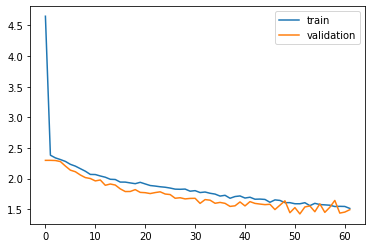

Train Score:  [1.453425645828247, 0.46958333253860474]
Validation Score:  [1.4903666973114014, 0.43833333253860474]


In [44]:
train_model(mfcc_features,
            all_labels,
            labels,
            model_name ='mfcc_cnn_model.hdf5',
            pickle_path='mfcc_cnn_model.pickle')

**CONV MODEL FOR FT features**

In [45]:
def train_model(fft_features, all_labels, labels,model_name, pickle_path):
  fft_features = np.array(fft_features)

  #convert the output to integer encoded 
  le=LabelEncoder()
  y = le.fit_transform(all_labels)
  classes = list(le.classes_)
  np.save(dir_path + '/classes_conv.npy',le.classes_)
  #and then to one-hot encoded
  y= np_utils.to_categorical(y, num_classes=len(labels))
  #reshape to 3d array for cnn 
  fft_features = np.array(fft_features).reshape(-1, len(fft_features[0]), 1)
  x_train, x_test, y_train, y_test = train_test_split(np.array(fft_features), np.array(y), stratify=y, test_size=0.2, random_state=777, shuffle= True)

  tf.convert_to_tensor(y)


  print('x_train: ', x_train.shape, '\nx_test: ', x_test.shape, '\ny_train: ', y_train.shape, '\ny_test: ', y_test.shape)

  K.clear_session()


  inputs = Input(shape=(len(fft_features[0]),1))

  conv = Conv1D(8, 13, padding='valid', activation='relu', strides=1)(inputs)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Second Conv1D layer
  conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Third Conv1D layer
  conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Fourth Conv1D layer
  conv = Conv1D(64, 2, padding='valid', activation='relu', strides=1)(conv)
  conv = MaxPooling1D(3)(conv)
  conv = Dropout(0.3)(conv)

  # Flatten layer
  conv = Flatten()(conv)

  # Dense Layer 1
  conv = Dense(256, activation='relu')(conv)
  conv = Dropout(0.3)(conv)

  # Dense Layer 2
  conv = Dense(128, activation='relu')(conv)
  conv = Dropout(0.3)(conv)

  outputs = Dense(len(labels), activation='softmax')(conv)

  model = Model(inputs, outputs)
  model.summary()

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001)

  if not os.path.exists(dir_path + '/saves'):
        os.makedirs(dir_path + '/saves')

  filepath = (dir_path + '/saves/' + model_name)

  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  model.save(filepath, True, True)

  hist = model.fit(x_train, y_train, epochs=100, callbacks=[earlystopping,checkpoint], batch_size=32, validation_data=(x_test, y_test))

  with open(dir_path + '/saves/'+ pickle_path, 'wb') as f:
        pickle.dump(hist.history, f)

  plt.plot(hist.history['loss'],label='train')
  plt.plot(hist.history['val_loss'],label='validation')
  plt.legend()
  plt.show()


  #Scores
  train_score = model.evaluate(x_train, y_train, verbose=0)
  validation_score = model.evaluate(x_test, y_test, verbose=0)
 

  print('Train Score: ', train_score)
  print('Validation Score: ', validation_score)

  


x_train:  (2400, 3000, 1) 
x_test:  (600, 3000, 1) 
y_train:  (2400, 10) 
y_test:  (600, 10)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 996, 8)            0         
_________________________________________________________________
dropout (Dropout)            (None, 996, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 986, 16)           1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 328, 16)           0         
___________________________

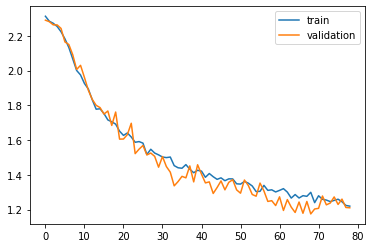

Train Score:  [1.1528573036193848, 0.5687500238418579]
Validation Score:  [1.2107126712799072, 0.54666668176651]


In [46]:
train_model(fft_features,
            all_labels,
            labels,
            model_name ='fft_cnn_model.hdf5',
            pickle_path='fft_cnn_model.pickle')

## PREDICTIONS

In [47]:
def predict(model_filepath,audiofiles, predict_files):
    model = load_model(model_filepath)
    classes = np.load(dir_path + '/classes_conv.npy')

    #print(classes)
    i=0
    for audio in audiofiles:
      prob = model.predict(audio.reshape(1,len(audio),1))
      index = np.argmax(prob[0])
      print("Word #"+str(i+1) +" : " +classes[index])
      i += 1
        



In [48]:
best_mfcc = dir_path + '/saves/mfcc_cnn_model.hdf5'
best_fft= dir_path + '/saves/fft_cnn_model.hdf5'

**PREDICTIONS FOR OUR MFFC MODEL**

In [49]:
predict(best_mfcc, mfcc_features, all_processed_samples)

Word #1 : four
Word #2 : four
Word #3 : four
Word #4 : four
Word #5 : four
Word #6 : four
Word #7 : four
Word #8 : four
Word #9 : four
Word #10 : four
Word #11 : four
Word #12 : four
Word #13 : four
Word #14 : four
Word #15 : four
Word #16 : four
Word #17 : four
Word #18 : four
Word #19 : four
Word #20 : four
Word #21 : four
Word #22 : four
Word #23 : four
Word #24 : four
Word #25 : four
Word #26 : four
Word #27 : four
Word #28 : four
Word #29 : four
Word #30 : four
Word #31 : four
Word #32 : four
Word #33 : four
Word #34 : four
Word #35 : four
Word #36 : four
Word #37 : two
Word #38 : four
Word #39 : four
Word #40 : four
Word #41 : four
Word #42 : four
Word #43 : four
Word #44 : four
Word #45 : four
Word #46 : four
Word #47 : four
Word #48 : four
Word #49 : four
Word #50 : four
Word #51 : four
Word #52 : four
Word #53 : four
Word #54 : four
Word #55 : four
Word #56 : four
Word #57 : four
Word #58 : four
Word #59 : four
Word #60 : four
Word #61 : four
Word #62 : four
Word #63 : four
Wo

**PREDICTIONS FOR OUR FFT MODEL**

In [50]:
predict(best_fft, fft_features, all_processed_samples)

Word #1 : six
Word #2 : three
Word #3 : three
Word #4 : three
Word #5 : three
Word #6 : three
Word #7 : three
Word #8 : three
Word #9 : six
Word #10 : three
Word #11 : three
Word #12 : three
Word #13 : three
Word #14 : six
Word #15 : three
Word #16 : six
Word #17 : six
Word #18 : six
Word #19 : six
Word #20 : three
Word #21 : three
Word #22 : three
Word #23 : three
Word #24 : three
Word #25 : three
Word #26 : three
Word #27 : three
Word #28 : six
Word #29 : three
Word #30 : three
Word #31 : six
Word #32 : three
Word #33 : six
Word #34 : six
Word #35 : three
Word #36 : three
Word #37 : three
Word #38 : six
Word #39 : three
Word #40 : three
Word #41 : three
Word #42 : six
Word #43 : three
Word #44 : three
Word #45 : three
Word #46 : three
Word #47 : three
Word #48 : three
Word #49 : three
Word #50 : three
Word #51 : three
Word #52 : three
Word #53 : three
Word #54 : six
Word #55 : three
Word #56 : three
Word #57 : three
Word #58 : three
Word #59 : six
Word #60 : three
Word #61 : three
Wo

In [90]:
# rec_filename = '/content/drive/My Drive/myASR/recordingsdataset/my_recordings/test_recording.wav'
# test_dir = dir_path + '/recordingsdataset/test_recordings'

# !cp '/content/drive/My Drive/myASR/recordingsdataset/split_to_words.py' .
# import split_to_words
# split_to_words.split_to_words(rec_filename,test_dir)



In [87]:
#predict_sample , sr = librosa.load(str(testdir + '/chunk0.wav'),sr = 8000, mono=True)
processed_predict_samples = []
test_dir = dir_path + '/recordingsdataset/test_recordings'

print(len(predict_samples))

my_recordings = [f for f in os.listdir(testdir) if f.endswith('.wav')]
print("Processing folder: ")
for audio in my_recordings:
    predict_sample , sr = librosa.load(str(testdir + '/' +audio),sr, mono=True) 
    processed_predict_sample = bandpassFilter(predict_sample, sr)
    trim_silence(processed_predict_sample)
    duration = librosa.get_duration(processed_predict_sample)
    processed_predict_samples.append(processed_predict_sample)
    #processed audio files
      


predict_features=[]

for audio in processed_predict_samples:
      
    duration = librosa.get_duration(audio)
    fft_sum_duration += duration
    
    ratio = duration / m_duration
    if ratio < 0.1:
        ratio = 0.1


    audio = librosa.effects.time_stretch(audio, ratio)

    frequency, magnitude, samples = FFT(sr, audio, str(k))

    length = 3000
    
    if len(magnitude) < length:
      zero_pad = np.lib.pad(magnitude, (0, length - len(magnitude)), 'constant',
                                     constant_values=0)
      predict_features.append(zero_pad)
    else:
      predict_features.append(magnitute[:length])


print("Dataset has been converted from time space to frequency space")




0
Processing folder: 
Dataset has been converted from time space to frequency space


In [89]:
predict(best_fft, predict_features, processed_predict_samples)

Word #1 : three
Word #2 : three
Word #3 : six
Word #4 : three
Word #5 : six
Word #6 : six
Word #7 : three


#ΣΥΜΠΕΡΑΣΜΑΤΑ

Τα αποτελεσμάτα δεν ήταν αρκετά ικανοποιητικά καθώς πετύχαμε ποσοστό ακριβείας train 56% και 54% στο test. 


Χρησιμοποίησα στην αρχή ένα σύνολο δεδομένων 2500 δειγμάτων και έπειτα ένα σύνολο 3000 δεδομένων. 
Παρατήρησα ότι ακομά και αυτή η μικρή αύξηση στο σύνολο δεδομένων αυξήσε το πόσοστο ακρίβειας απο 50% σε 60% στο train και απο 48% σε 57% στο test

Αν είχα χρησιμοποιήσει ενα μεγαλύτερο σύνολο δεδομένων τα ποσοστά ακριβείας στο μοντελο θα ήταν ακόμα πιο υψηλά και έτσι το συνελικτικό νευρωνικό δίκτυο θα πετύχαινε καλύτερες προβλέψεις.

Η πρόβλεψη ήταν λάθος και σίγουρα δεν ήταν αυτη που περιμέναμε ή μαλλον ήταν λόγω του ποσοστού ακρίβειας.

Μια βασική διαφορά των CNN απο τα κλασσικά feed forward νευρωνικά δίκτυα  είναι οτι μπορούν να λειτουργήσουν εξίσου καλά και σε μη επεξεργασμένα χαρακτηριστικά κατι που είναι πολυ σημαντικό για την πρόβλεψη.